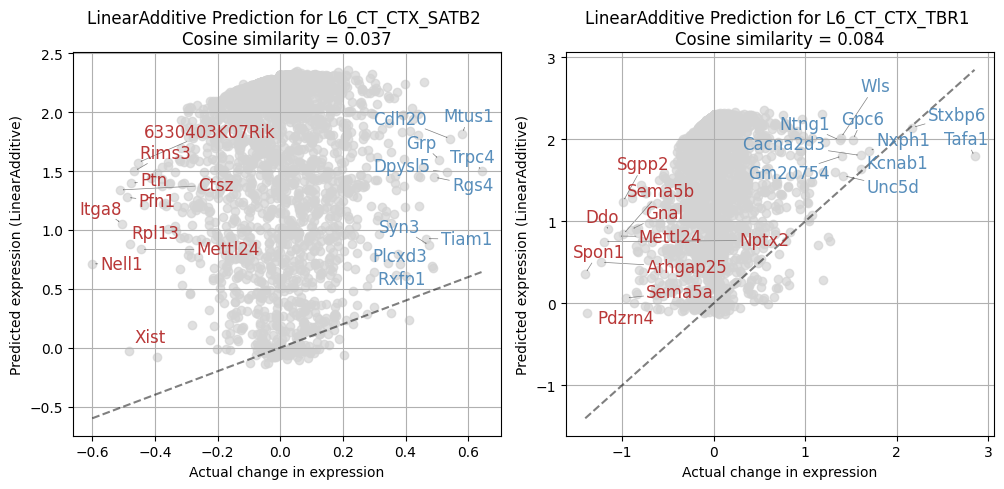

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from adjustText import adjust_text 
import pickle 
import math

pkl_res = "/gpfs/home/asun/jin_lab/perturbench/1_train/logs/train/runs/2025-09-26_11-01-16_boli_linear_baseline/evaluation/eval.pkl"
with open(pkl_res, "rb") as f:
    eval_data = pickle.load(f)
model_name = "LinearAdditive"
df_pred = eval_data.aggr["logfc"][model_name].to_df()
df_ref = eval_data.aggr["logfc"]["ref"].to_df()
genes = boli.var["gene_name"].values


cell_perts = df_pred.index.tolist()
num_plots = len(cell_perts)
cols = int(math.ceil(math.sqrt(num_plots))) + 2
rows = int(math.ceil(num_plots / cols))

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()
for i, cell_pert in enumerate(cell_perts):
    ax = axes[i]
    x_vals = df_ref.loc[cell_pert].values
    y_vals = df_pred.loc[cell_pert].values
    cos_sim = cosine_similarity(x_vals.reshape(1, -1), y_vals.reshape(1, -1))[0, 0]

    top10_idx = np.argsort(x_vals)[-10:]
    bottom10_idx = np.argsort(x_vals)[:10]
    top_and_bottom_idx = set(top10_idx).union(set(bottom10_idx))

    colors = ["steelblue" if idx in top10_idx else "firebrick" for idx in range(len(y_vals))]

    ax.scatter(x_vals, y_vals, alpha=0.7, color="lightgray")
    ax.plot([x_vals.min(), x_vals.max()], [x_vals.min(), x_vals.max()], 'k--', alpha=0.5)
    ax.set_xlabel("Actual change in expression")
    ax.set_ylabel(f"Predicted expression ({model_name})")
    ax.set_title(f"{model_name} Prediction for {cell_pert} \nCosine similarity = {cos_sim:.3f}")
    ax.grid(True)

    texts = []
    for idx in top_and_bottom_idx:
        color = "steelblue" if idx in top10_idx else "firebrick"
        texts.append(
            ax.text(
                x_vals[idx], y_vals[idx], genes[idx],
                fontsize=12,
                color=color,
                alpha=0.9,
                ha='right' if idx in top10_idx else 'left',
                va='bottom'
            )
        )
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5), ax=ax)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

In [5]:
eval_data.aggr["logfc"]["ref"]

View of AnnData object with n_obs × n_vars = 6 × 6642
    obs: 'cell_line', 'gene', 'cov_merged'

In [11]:
genes

Index(['4', '5', '7', '11', '14', '18', '19', '27', '41', '42',
       ...
       '32197', '32198', '32199', '32200', '32201', '32203', '32204', '32205',
       '32207', '32261'],
      dtype='object', length=5000)

In [1]:
import scanpy as sc


In [2]:
boli = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/boli_ctx_scprocess_no+ctrl.h5ad')


In [4]:
import sys, os, scipy, importlib, pkgutil
print("Python:", sys.version)
print("SciPy:", scipy.__version__, scipy.__file__)

# Show where scipy.sparse is coming from and whether linalg exists
import scipy.sparse as spmod
print("scipy.sparse path:", getattr(spmod, "__file__", "<namespace>"))
print("has linalg attribute:", hasattr(spmod, "linalg"))
try:
    import scipy.sparse.linalg as splinalg
    print("cg present:", hasattr(splinalg, "cg"))
except Exception as e:
    print("Import error for scipy.sparse.linalg:", repr(e))

Python: 3.11.13 | packaged by conda-forge | (main, Jun  4 2025, 14:48:23) [GCC 13.3.0]
SciPy: 1.12.0 /gpfs/home/asun/miniforge3/envs/perturbbench/lib/python3.11/site-packages/scipy/__init__.py
scipy.sparse path: /gpfs/home/asun/miniforge3/envs/perturbbench/lib/python3.11/site-packages/scipy/sparse/__init__.py
has linalg attribute: False
cg present: True


In [2]:
import scanpy as sc
boli = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/boli_ctx_scprocess_no+ctrl.h5ad')


AttributeError: module 'scipy.sparse' has no attribute 'linalg'

In [14]:
boli

AnnData object with n_obs × n_vars = 21700 × 5000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_clusters', 'Assign', 'scds', 'cxds', 'bcds', 'Sample', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.subclass.score', 'predicted.subclass', 'CT', 'mito', 'BioSamp', 'CT2', 'ForPlot', 'Remove', 'active_ident', 'Assign_clean', 'condition', 'cell_type', 'cell_class'
    var: 'variable_gene', 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'

In [15]:
boli.var["gene_name"].values

array(['Rp1', 'Sox17', 'Gm37323', ..., 'mt-Nd5', 'mt-Cytb',
       'CAAA01147332.1'], dtype=object)

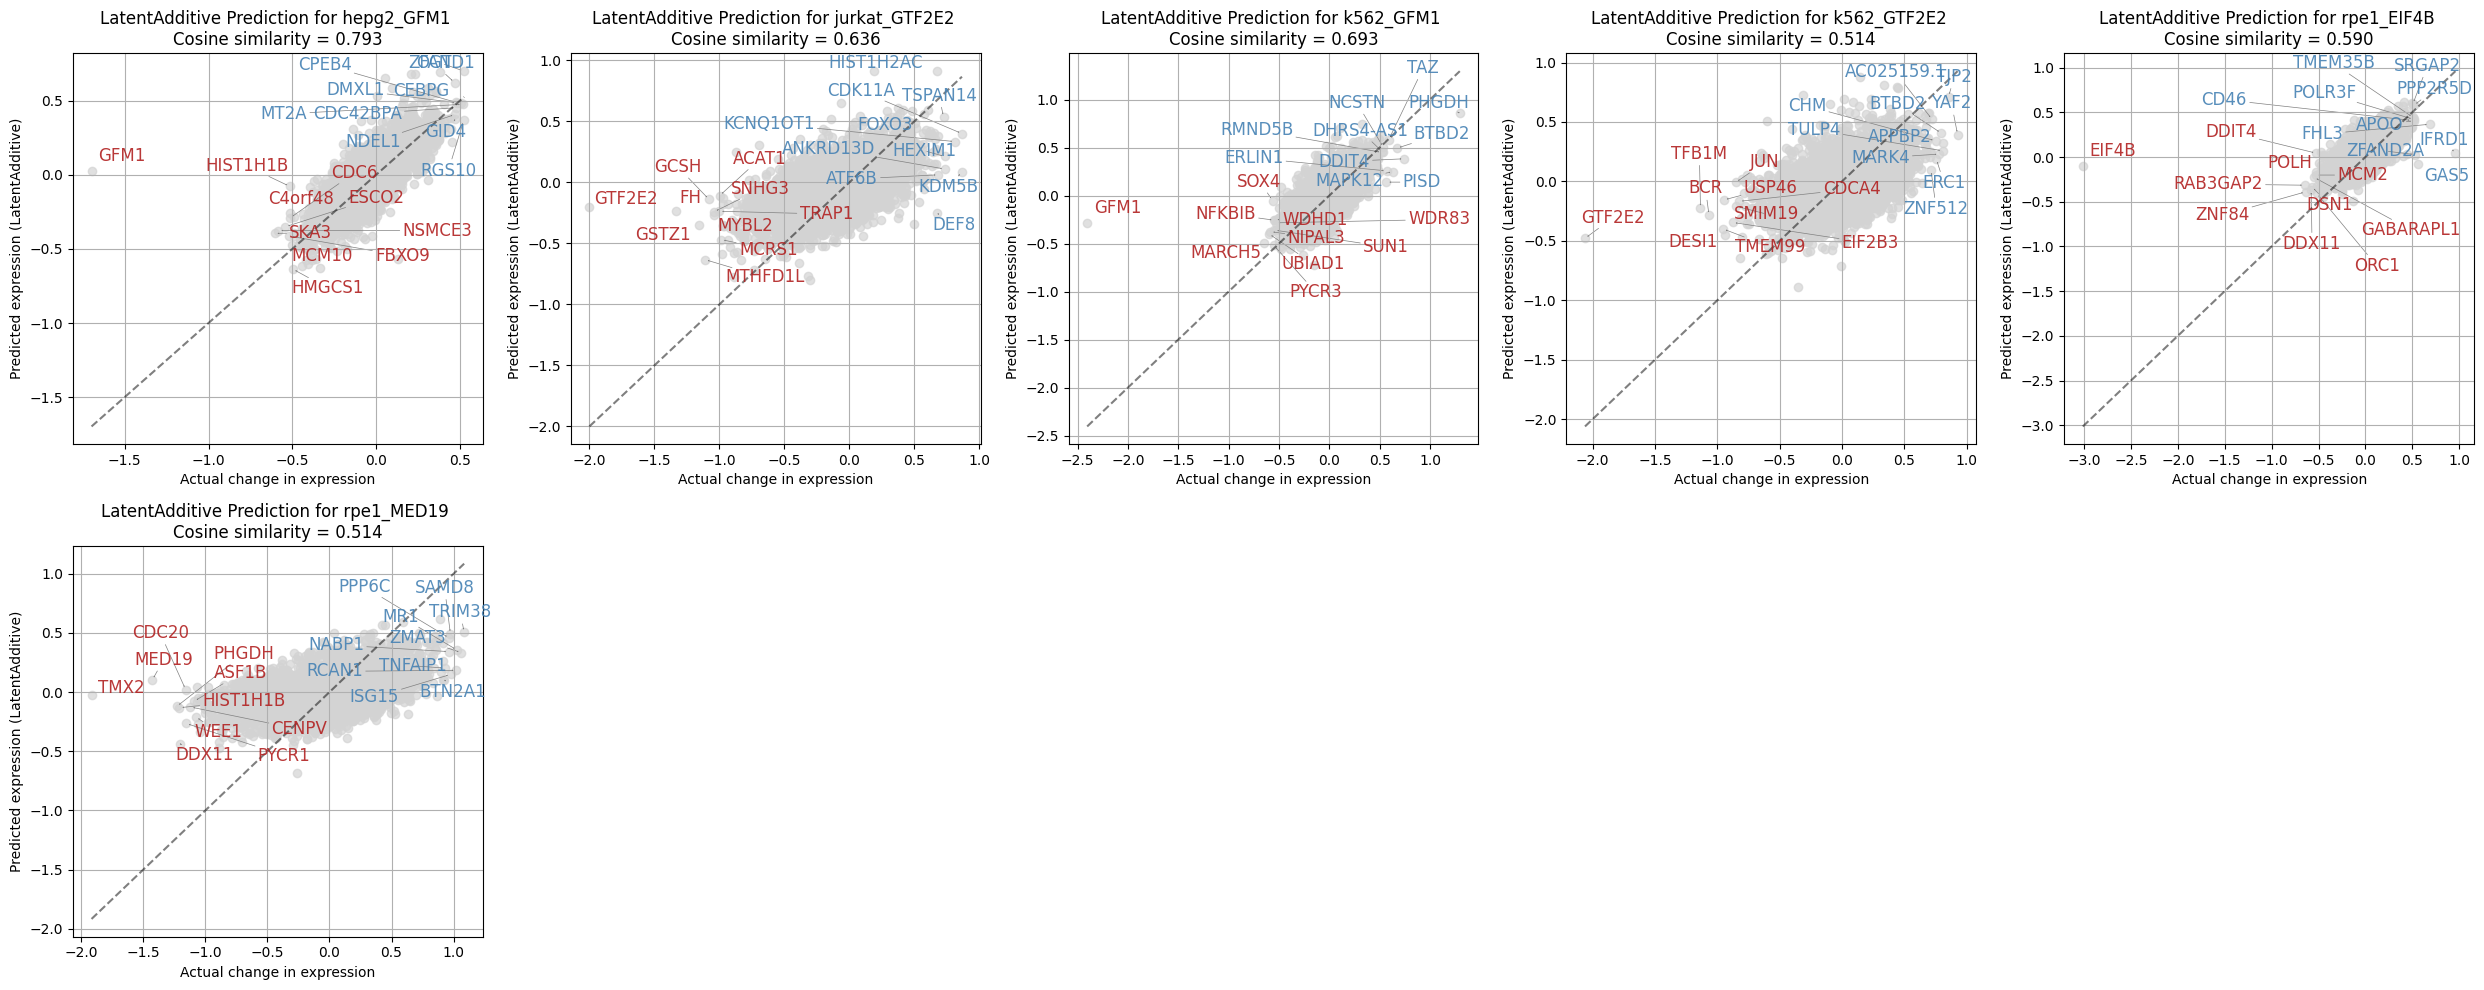

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from adjustText import adjust_text 
import pickle 
import math

pkl_res = "/gpfs/home/asun/jin_lab/perturbench/1_train/logs/train/multiruns/2025-09-23_13-02-50/0_replogle_qual_high_amt_high/evaluation/eval.pkl"
with open(pkl_res, "rb") as f:
    eval_data = pickle.load(f)
model_name = "LatentAdditive"
df_pred = eval_data.aggr["logfc"][model_name].to_df()
df_ref = eval_data.aggr["logfc"]["ref"].to_df()
genes = df_pred.columns


cell_perts = df_pred.index.tolist()
num_plots = len(cell_perts)
cols = int(math.ceil(math.sqrt(num_plots))) + 2
rows = int(math.ceil(num_plots / cols))

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()
for i, cell_pert in enumerate(cell_perts):
    ax = axes[i]
    x_vals = df_ref.loc[cell_pert].values
    y_vals = df_pred.loc[cell_pert].values
    cos_sim = cosine_similarity(x_vals.reshape(1, -1), y_vals.reshape(1, -1))[0, 0]

    top10_idx = np.argsort(x_vals)[-10:]
    bottom10_idx = np.argsort(x_vals)[:10]
    top_and_bottom_idx = set(top10_idx).union(set(bottom10_idx))

    colors = ["steelblue" if idx in top10_idx else "firebrick" for idx in range(len(y_vals))]

    ax.scatter(x_vals, y_vals, alpha=0.7, color="lightgray")
    ax.plot([x_vals.min(), x_vals.max()], [x_vals.min(), x_vals.max()], 'k--', alpha=0.5)
    ax.set_xlabel("Actual change in expression")
    ax.set_ylabel(f"Predicted expression ({model_name})")
    ax.set_title(f"{model_name} Prediction for {cell_pert} \nCosine similarity = {cos_sim:.3f}")
    ax.grid(True)

    texts = []
    for idx in top_and_bottom_idx:
        color = "steelblue" if idx in top10_idx else "firebrick"
        texts.append(
            ax.text(
                x_vals[idx], y_vals[idx], genes[idx],
                fontsize=12,
                color=color,
                alpha=0.9,
                ha='right' if idx in top10_idx else 'left',
                va='bottom'
            )
        )
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5), ax=ax)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()